In [1]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import Aer
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram, plot_distribution

In [32]:
qc = QuantumCircuit(1)

qc.h(0)

qc.measure_all()

print(qc.draw())

qc.draw(output="mpl")

backend = Aer.get_backend('qasm_simulator')
target = backend.target

pass_manager = generate_preset_pass_manager(target=target, optimization_level=0, backend=backend)

transpiled = pass_manager.run(qc)

sampler = Sampler(mode=backend)

job = sampler.run([transpiled], shots=500)

result = job.result()

dist = result[0].data.meas.get_counts()
display(dist)
#plot_distribution(dist, title="Classical results for Superposition (in %)")

        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 


{'1': 239, '0': 261}

        ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ X ├┤ X ├─░─┤M├───
        ├───┤└─┬─┘ ░ └╥┘┌─┐
   q_1: ┤ X ├──■───░──╫─┤M├
        └───┘      ░  ║ └╥┘
   c: 2/══════════════╬══╬═
                      ║  ║ 
meas: 2/══════════════╩══╩═
                      0  1 


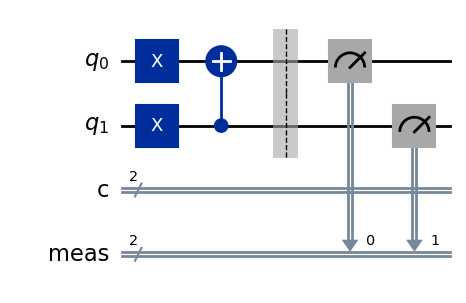

Counts: {'10 00': 500}


In [40]:
qc = QuantumCircuit(2, 2)

qc.x(0)
qc.x(1)

#qc.x(0)
qc.cx(1, 0)

qc.measure_all()

print(qc.draw())
display(qc.draw(output="mpl"))


simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
job = simulator.run(transpiled_qc, shots=500)

result = job.result()
counts = result.get_counts()

print("Counts:", counts)

     ┌───┐     ┌─┐
q_0: ┤ H ├──■──┤M├
     └───┘┌─┴─┐└╥┘
q_1: ─────┤ X ├─╫─
          └───┘ ║ 
c: 1/═══════════╩═
                0 
Counts: {'1': 239, '0': 261}


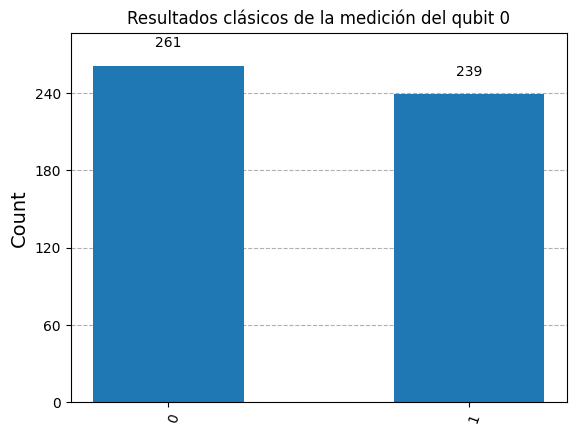

In [37]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 1)

qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)

print(qc.draw())

simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
job = simulator.run(transpiled_qc, shots=500)

result = job.result()
counts = result.get_counts()

print("Counts:", counts)

#plot_histogram(counts)